<a href="https://colab.research.google.com/github/RafaelSapia/projetos_data_science/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os já existentes no mercado representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [3]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


sns.set()

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe

df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Iniciando a parte de análise exploratória do projeto, aqui iremos conhecer melhor o conjunto de dados que será trabalhado. Essa parte serve para entendermos melhor como as variáveis se comportam e para tirarmos insights a partir de gráficos e tabelas.

### Observando o *dataset*

Iniciaremos esta análise assim como todas as outras, observando a "cara" do conjunto de dados que iremos trabalhar e seu tamanho. Esta parte, apesar de simples, é essencial para nos familiazarmos com o modo como os dados são apresentados e aumentar a qualidade dos insights futuros, principalmente neste *dataset*, pois temos uma peculiaridade, como ja dito, os dados estão transformados por meio do método de PCA.

In [ ]:
# observando 5 primeiras entradas

print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}'.format(df.shape[1]))

df.head()

Entradas: 284807
Variáveis: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Temos 284807 entradas cada uma representando uma transação por cartão de crédito.

Note que temos ao todo 31 variáveis, sendo que 28 delas estão transformadas por meio do método PCA. 

Este método constitui-se em uma redução de dimensionalidade das variáveis reais, ou seja, o que foi feito consiste em recolher todas as características obtidas pelo banco em relação a cada transação bancária (informações pessoais do indivíduo, informações bancárias sobre a transação, etc) traduzindo as informações não numéricas para números. Após isto, o algorítmo PCA analisa dentre as muitas informações sobre cada transação, aquelas que mais tem peso em cada uma delas, as mais expressivas. Estas que possuem mais peso passam por um processo de transformação (que pode ser pensada como se fosse uma troca de base numérica) para se tornar como é apresentado no *dataset* acima, de modo que se torna impossível de identificar sobre o que exatamente cada variável diz respeito. Para os curiosos, [aqui](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) está um link que explora melhor este método.

Vale pontuar que apesar dessa proteção dos dados não impede de se fazer predições em cima deles, uma vez que a característica de cada informação ainda está impressa nos números apresentados, por mais que para nós eles não pareçam fazer sentido.

As únicas variáveis que não passaram pelo método PCA foram:

  * `Time` - Mostra o tempo em segundos decorrido entre a **primeira transação** do *dataset* e a **transação em questão**.
  * `Amount` - A quantidade em Euro de cada transação feita
  * `Class` - Mostra se a transação foi fraudulenta, representado por **1**, ou não fraudulenta, representado por **0**. 

### Resumo estatístico

Em geral é interessante observar o resumo estatístico, pois a partir dele é possível tirar alguns insights, porém neste caso a análise das métricas estatísticas não será possível devído à transformação da maioria dos dados. 

De qualquer forma, observaremos a tabela com algumas medidas estatísticas utilizando `describe`.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como esperado, não conseguimos tirar infomações a partir das medidas apresentadas em relação às variáveis transformadas. 

Em relação à quantidade de cada transação temos como média 88.35 Euros aproximadamente.

### Verificando valores ausentes

Valores ausentes sempre são um problema, veremos utilizando `isnull`, se neste *dataset* se existe algum valor faltante.

In [ ]:
# vendo valores ausentes

df.isnull().sum().max()

0

Vemos que o não existe nenhum valor ausente, o que indica um conjunto de dados de qualidade. Quanto a isso não precisaremos nos preocupar.

### Observando desbalanceamento do *dataset*

Como já dito na introdução, temos um conjunto de dados desbalanceado, ou seja, temos uma grande quantidade de transações normais e poucas transações fraudulentas. Isso torna nosso modelo inviesado, precisamos tratar estes dados afim de eliminar esse desbalanceamento.

Veremos aqui qual a magnitude deste problema.

492 transações do dataset foram fraudulentas representando 0.1727%


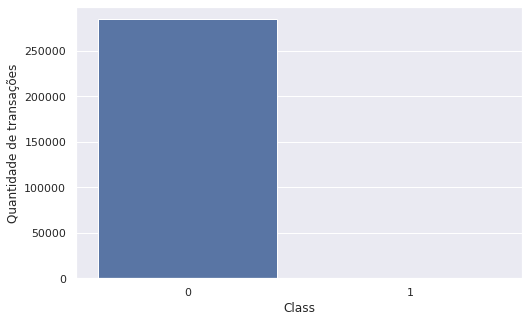

In [ ]:
# porcentagem de transações com fraude

print('{} transações do dataset foram fraudulentas representando {:.4f}%'.
      format(df[df.Class == 1].shape[0] ,(df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# gráfico para quantidade de transações fraudulentas e não fraudulentas

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df.Class, ax=ax)
ax.set_ylabel('Quantidade de transações')
plt.show()

É nitido que a quantidade de fraudes é substancialmente menor que a quantidade de transações normais, apenas aproximadamente 0,17%. No gráfico de barras, não é possível perceber esta quantidade.

Por esse motivo antes de treinarmos nosso modelo de previsão será necessário um balanceamento destes dados de modo a tornar a quantidade de transações fraudulentas significante em relação a todo o conjunto de dados, seja por retirada ou adição de valores. Mais para frente será discorrido melhor sobre este problema. 

### Histogramas 

Antes de iniciarmos a construção do modelo precisamos verificar como se comporta a relação entre a nossa variável alvo, `Class`, com as outras variáveis.

Para as duas variáveis explanatórias que não foram transformadas, `Time` e `Amount`, visualizaremos os histogramas delas em relação às transações fraudulentas e não fraudulentas separadamente. A partir deles veremos se é possível identificar algum padrão. 

**Histograma para `Time`**



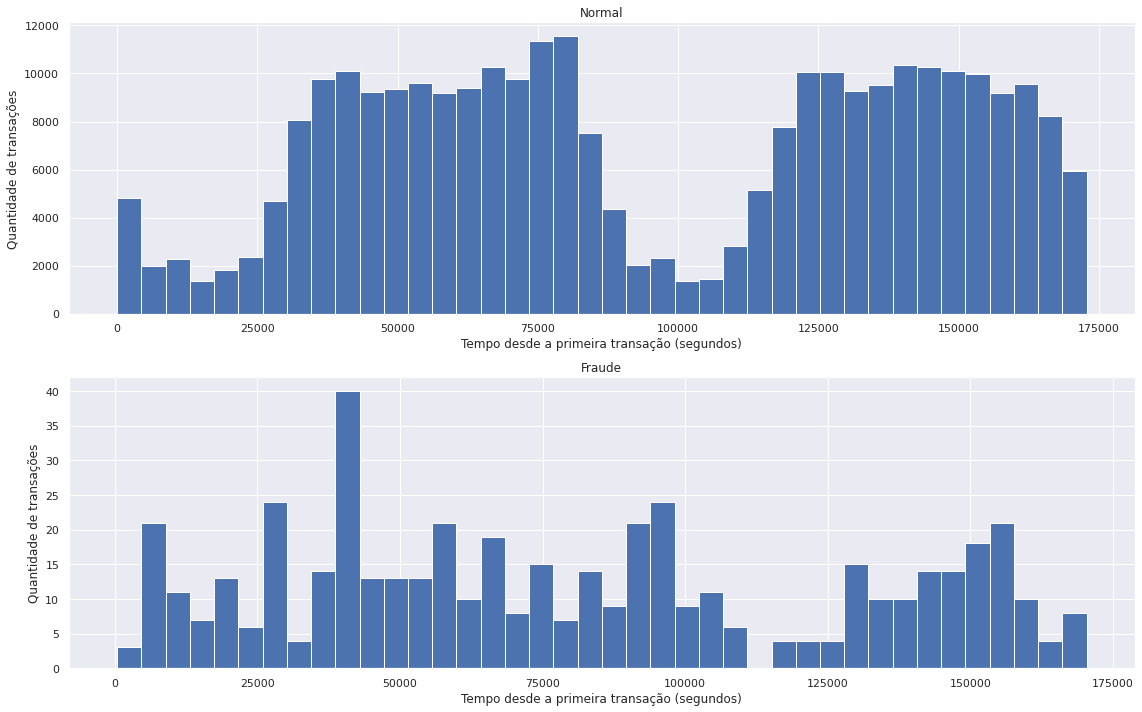

In [ ]:
# histograma para time em relação a transações não fradulentas

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].hist(df[df.Class == 0].Time, bins=40)
ax[0].set_title('Normal')
ax[0].set_ylabel('Quantidade de transações')
ax[0].set_xlabel('Tempo desde a primeira transação (segundos)')

ax[1].hist(df[df.Class == 1].Time, bins=40)
ax[1].set_title('Fraude')
ax[1].set_ylabel('Quantidade de transações')
ax[1].set_xlabel('Tempo desde a primeira transação (segundos)')

plt.tight_layout()

Observando os dois histogramas conseguimos identifcar uma diferença entre eles.

As transações normais possuem uma periodicidade bem definida. Note que pelo histograma delas vemos uma oscilação marcante, isso certamente está conectado ao período do dia que ocorrem mais transações, provavelmente no horário comercial normal.

No histograma de transações fraudulentas não conseguimos enxergar esta periodicidade. Por outro lado, conseguimos enxergar alguns picos, ou seja, de tempos em tempos vemos que ocorre uma alta considerável de fraudes em um curto intervalo de tempo. É possivel observar bem este padrão observando o comportamento do histograma entre 50000 e 100000 segundos.


**Histograma para `Amount`**

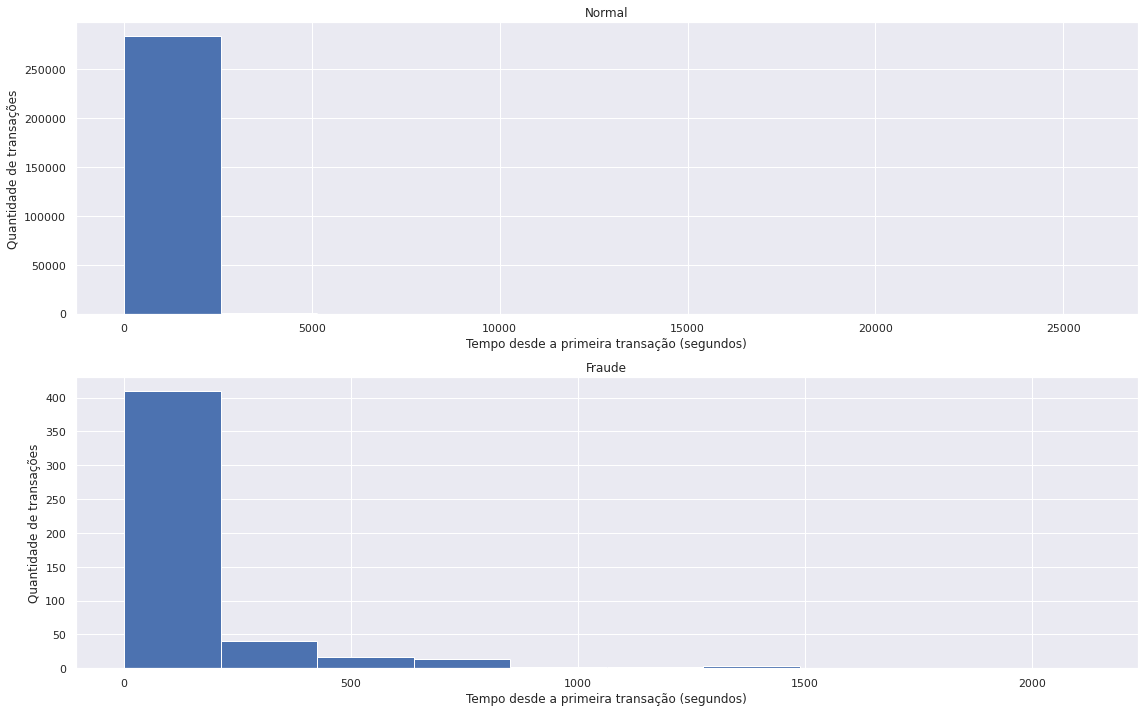

In [ ]:
# histograma para amount em relação a transações não fradulentas

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].hist(df[df.Class == 0].Amount, bins=10)
ax[0].set_title('Normal')
ax[0].set_ylabel('Quantidade de transações')
ax[0].set_xlabel('Tempo desde a primeira transação (segundos)')

ax[1].hist(df[df.Class == 1].Amount, bins=10)
ax[1].set_title('Fraude')
ax[1].set_ylabel('Quantidade de transações')
ax[1].set_xlabel('Tempo desde a primeira transação (segundos)')

plt.tight_layout()

Assim como nos histogramas para o Tempo (`Time`) podemos, nestes dois histogramas, notar peculiaridades e diferenças entre a quantidade de dinheiro envolvido em transações fraudulentas e não fraudulentas.

As transações não fraudulentas possuem uma abrangência de 0 a 25000 Euros de valor transacionado. Este raio é muito grande quando comparado às transações com fraude que abrangem valores entre 0 e 2000 Euros.

Conseguimos notar também que apesar da grande abrangência de valor nas transações normais, a grande maioria delas são com valores abaixo de 2500 Euros aproximadamente. 

Podemos dizer que essa caracteristica tambem é aplicável às transações fraudulentas, pois podemos observar no histograma delas que apesar de existirem valores de transação de 2000 euros, a grande maioria dos valores envolvidos em transações fraudulentas se concentram na faixa de 0 a 800 Euros aproximadamente.

### **Boxplot para `Amount` quando houve fraude**

Analisando um pouco melhor a quantidade de dinheiro envolvido em transações com fraude, vamos visualizar agora o Boxplot para a variável `Amount` quando houve fraude.

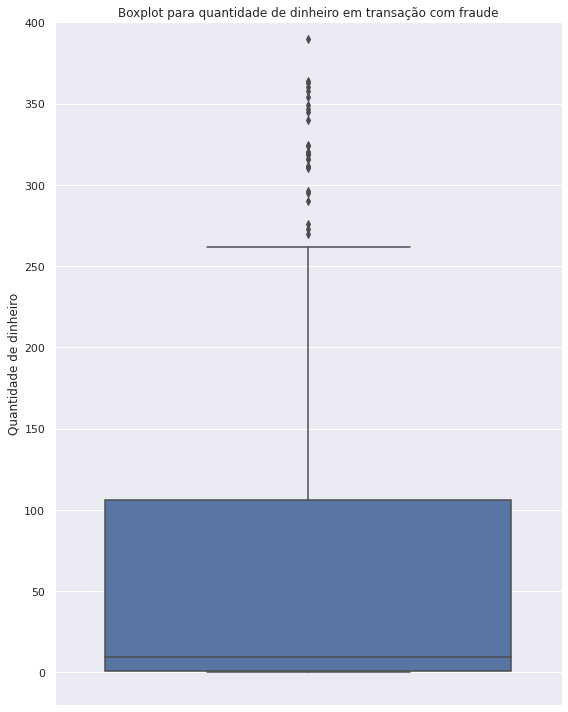

In [ ]:
# boxplot para amount com transações fraudulentas

fig, ax = plt.subplots(figsize=(8,10))

sns.boxplot(df[df.Class == 1].Amount, ax=ax, orient='v')
ax.set_ylim(-20, 400)
ax.set_title('Boxplot para quantidade de dinheiro em transação com fraude')
ax.set_ylabel('Quantidade de dinheiro')

plt.tight_layout()

Refinando ainda mais a informação que foi tirada observando o histograma para esse mesmo subconjunto (quantidade de dinheiro envolvida em transações com fraude), vemos que 75% das transações com fraude tiveram uma quantidade de dinheiro envolvida menor que 110 Euros. 

### **Matriz de correlação para as variáveis**

Chegando ao fim da etapa de análise exploratória dos dados, veremos a matriz de correlação das variáveis presentes no nosso *dataset*. A maioria delas não conseguimos saber seu significado, porém saber como elas se correlacionam entre si nos dá grandes informações sobre por onde provavelmente o modelo mais aprenderá, quais correlacões dará a ele mais informações para a classificação em transação fraudulenta ou não fraudulenta.

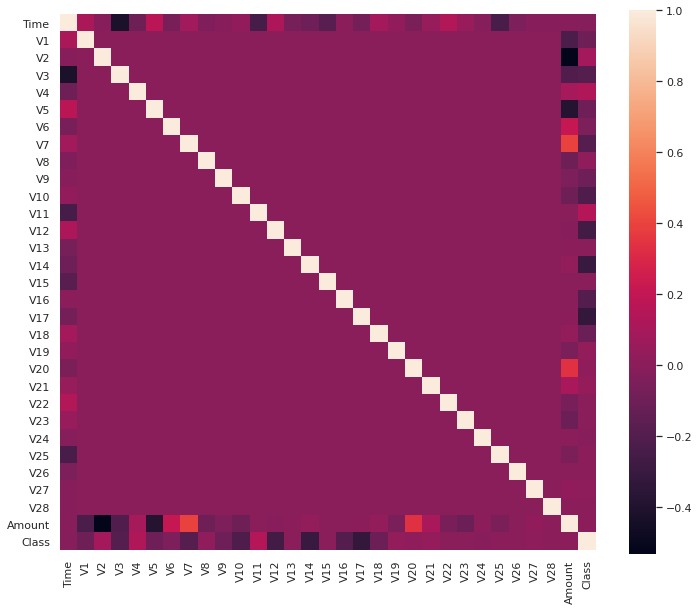

In [ ]:
# matriz de correlação para as variáveis

fig, ax = plt.subplots(figsize=(12, 10))

matriz = df.corr()
sns.heatmap(matriz, square=True)

plt.show()

Vemos que as variáveis que foram transformadas pelo método PCA aparentemente não possuem uma correlação muito forte entre si, somente conseguimos identificar alguns casos de correlação mais forte entre algumas variáveis com PCA e as variáveis `Time` e `Amount` e a variável alvo `Class`. Porém, este fato é gerado pelo desbalanceamento dos dados. Mais para frente, será plotada uma matriz de correlação para os dados balanceados e será possível identificar as correlações verdadeiras.

## Preparação dos Dados

Nesta etapa prepararemos os dados para poder treinar o modelo. Três processos serão feitos aqui:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

### **Normalizando `Time` e `Amount`**

As únicas duas variáveis explanatórias que não estão normalizadas são `Time` e `Amount`. Dessa forma, elas apresentam ordem de grandeza diferente das demais, e portanto, afim de evitar redução do desempenho do modelo preditivo, é necessário normaliza-las. 

O processo de normalização nada mais é subtrair de cada entrada da variável a média daquela variável e dividir pelo desvio padrão da variável.

In [ ]:
# normalizando time e amount

df_2 = df.copy()

scaler = StandardScaler()

scaler.fit(df_2.Time.values.reshape(-1,1))
df_2['time_norm'] = scaler.transform(df_2.Time.values.reshape(-1,1))

scaler.fit(df_2.Amount.values.reshape(-1,1))
df_2['amount_norm'] = scaler.transform(df_2.Amount.values.reshape(-1,1))


df_2 = df_2.drop(['Time', 'Amount'], axis=1)


df_2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,time_norm,amount_norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


### Treino e Teste

Parte crucial para a costrução do modelo é a divisão dos dados em dados de treino e dados de teste e separação da variável alvo (`Class`) das variáveis explanatórias.

In [ ]:
# dividindo variavel alvo das explicativas

X = df_2.drop('Class', axis=1)
y = df_2.Class

# dividindo em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Balanceando os dados

Como comentado na análise exploratória, é necessário balancear este conjunto de dados, pois temos muitas entradas com transações normais e poucas com transações fraudulentas.

Como também ja comentado, existem basicamente duas maneiras de rebalancearmos os dados:

  * Tirar os dados da classe em excesso, técnica conhecida como *under-sampling*
  * Adicionar dados da classe com poucos dados, técnica conhecida como *over-sampling*

Os dois métodos possuem vantagens e desvantagens. Para o caso em questão optaremos pelo *under-sampling*.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


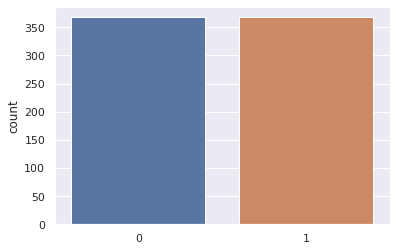

In [ ]:
# balanceando os dados

bal = RandomUnderSampler()
X_bal, y_bal = bal.fit_sample(X_train, y_train)

sns.countplot(y_bal)

Agora, nos dados que usaremos para treinar o modelo temos a mesma quantidade de entradas de transações fraudulentas e não fraudulentas.

Podemos agora vizualizar novamente a matriz de correlação entre as variáveis e notar a diferença entre esta nova matriz e a mostrada anteriormente.

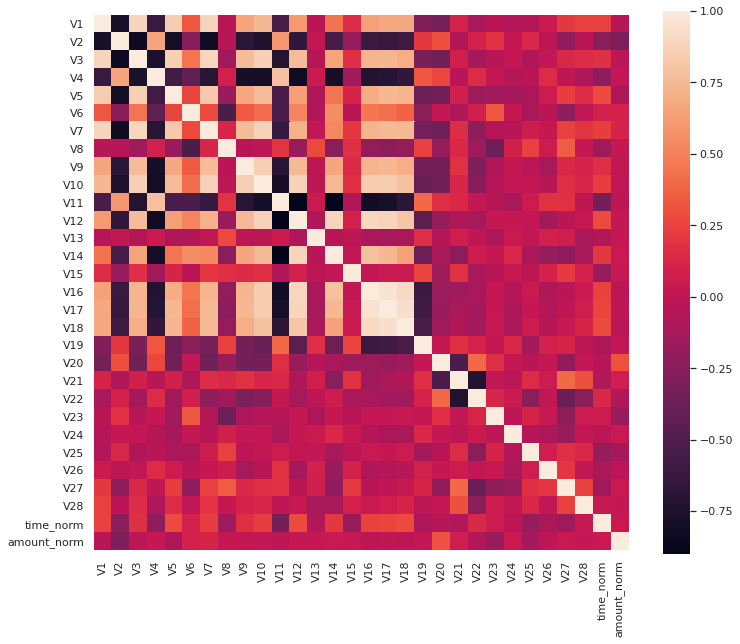

In [ ]:
# fazendo nova matriz de correlação

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(pd.DataFrame(X_bal).corr(), ax=ax, square=True, 
            xticklabels=X_train.columns, yticklabels=X_train.columns)

plt.show()

## Modelos de Machine Learning

Finalmente chegamos ao momento de construção dos modelos que irão tentar prever a existência de fraude em uma transação bancária por meio de cartão de crédito. Aqui serão feitos dois modelos para classificar as transações, um deles será com o algoritmo de regressão logística e o outro com o modelo de árvores de decisão.

### Modelo 1

Neste primeiro modelo utilizaremos Regressão logística para prever novas transações fraudulentas. Para isso utilizaremos o `LogisticRegression`.

In [ ]:
# criando modelo
np.random.seed(12)
model1 = LogisticRegression()

# treinando modelo

model1.fit(X_bal, y_bal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Agora que treinamos o modelo de regressão linear com os dados balanceados podemos fazer a previsão para os dados de teste (`X_test`) e comparar com o resultado real (`y_test`) para ver o quão bom está nosso modelo.

In [ ]:
# prevendo transações de teste

y_prev1 = model1.predict(X_test)

### Modelo 2 

Neste segundo modelo utilizaremos uma árvore de decisão. Para fazer a previsão utilizaremos `DecisionTreeClassifier`.

In [ ]:
# instanciando modelo
np.random.seed(11)
model2 = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# treinando modelo

model2.fit(X_bal, y_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Assim como feito para o modelo 1, preveremos agora os casos de transações fraudulentas presentes no `y_test`.

In [ ]:
# prevendo transações do teste com modelo 2

y_prev2 = model2.predict(X_test)

Para a árvore de decisão podemos observar a "cara" dela, podendo, dessa forma, observar quais foram as variáveis que mais pesaram para a decisão do modelo.

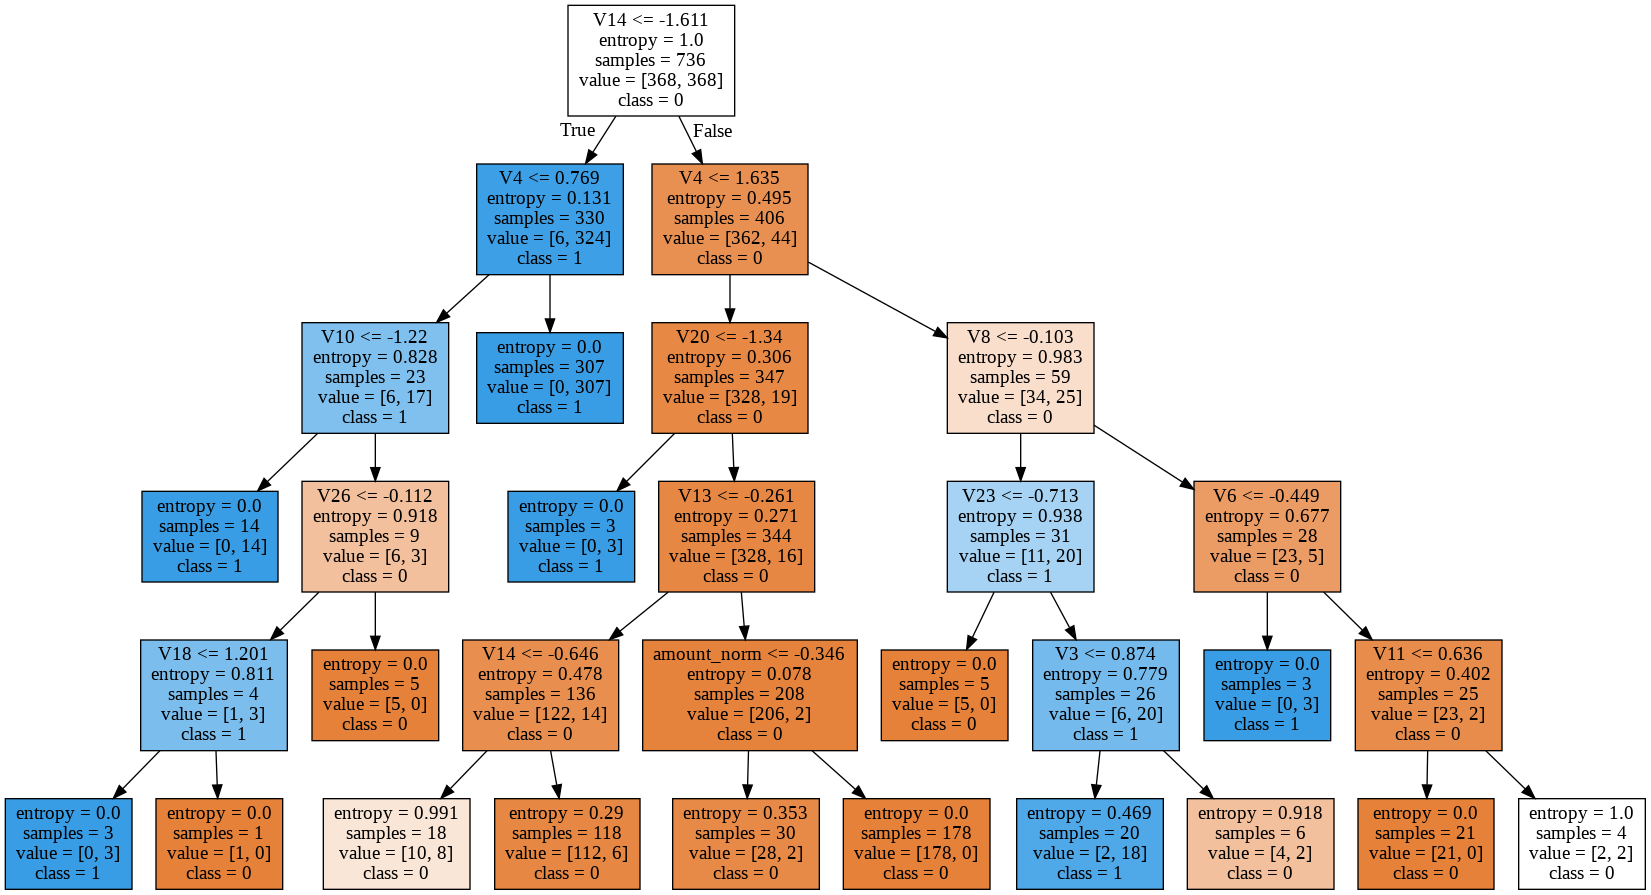

In [ ]:
# visualizando arvore de decisão

dot = export_graphviz(model2, filled=True, 
                      feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

## Avaliar o desempenho dos modelos

Finalizando o processo de predição de fraudes em transações por cartão de crédito, faremos agora a análise do desemprenho dos modelos. Esta parte é sempre necessária quando se produz um modelo de machine learning, pois é aqui que vemos o quão bom está nosso modelo, se realmente vale a pena criar um modelo preditivo para o problema que queremos, vemos se é possível otimizar o modelo, observamos se existe algum tipo de enviesamento do modelo ou se é necessário alguma correção.

Tentaremos aqui encontrar a melhor métrica para avaliar o desempenho do modelo  e compararemos um modelo com o outro a fim de encontrar qual se saiu melhor na predição.


### Matriz de confusão para os modelos

A matriz de confusão é uma separação dos dados de acordo com o julgamento do modelo, ou seja, caso o modelo tenha julgado uma transação como fraudulenta e ela realmente for, caracterizamos isto como **Verdadeiro Positivo** (TN - True Positive). Caso o modelo julgue como fraude uma transação **não** fraudulenta, temos **Falso Positivo** (FP - False Positive). Do mesmo modo, caso o modelo diga que não tem fraude em uma transação que **possui** fraude, temos um **Falso Negativo** (FN - False Negative). E por fim, caso o modelo diga que não tem fraude numa transação que realmente não tenha dizemos que isto é um **Verdadeiro Negativo** (TN - True Negative).



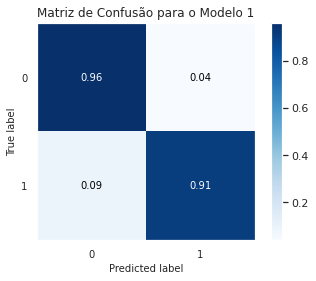

In [ ]:
# matriz de confusão para o modelo 1 

skplt.metrics.plot_confusion_matrix(y_test, y_prev1, normalize=True, title= 'Matriz de Confusão para o Modelo 1');

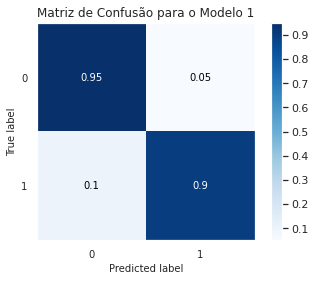

In [ ]:
# matriz de confusão para o modelo 2 

skplt.metrics.plot_confusion_matrix(y_test, y_prev2, normalize=True, title= 'Matriz de Confusão para o Modelo 1');

Podemos ver que no modelo de regressão logística tivemos 91% das fraudes previstas e no modelo de árvores de decisão tivemos 90% das fraudes previstas (olhe o quadrado no canto inferior direito). 

Avaliando os resultados obtidos, podemos a primeiro momento dizer que o modelo em que usamos regressão logística se saiu melhor, pois previu corretamente uma maior quatidade de transações. Porém, antes de "bater o martelo" precisamos observar algumas métricas. 

### Métricas

Veremos aqui um conjunto de métricas para os modelos. Serão 5 observadas:

  * Acurácia
  * Precisão
  * Recall
  * F1-score
  * AUC ROC

A acurária é a medida de acertos do modelo, ou seja, a quantidade de dados que o modelo julgou corretamente. Ela responde a seguinte pergunta "Qual fração dos dados que o modelo acertou?"

\begin{equation*}
  Acuracia = \frac{VP + VN}{VP + FP + VN + FN}
\end{equation*}

A precisão é a medida de quanto o modelo previu o que se queria (VP) em relação a todas as entradas que ele disse que são positivas, esta medida responde a pergunta "Em relação às entradas que o modelo disse que são fraudulentas, quais realmente são?".

\begin{equation*}
  Precisao = \frac{VP}{VP + FP}
\end{equation*}

O recall mede quando o modelo previu o que se queria (VP) em relação à quantidade total de entradas verdadeiramente positivas. A pergunta respondida por esta medida é "Em relação à todas as fraudes do conjunto de dados, quantas o modelo acertou?"

\begin{equation*}
  Recall = \frac{VP}{VP + FN}
\end{equation*}

A F1-score é uma média harmônica da precisão e do recall. Tem uma escala de 0 a 1.

\begin{equation*}
  F1-score = 2 * \frac{Recall * Precisao}{Recall + Precisao}
\end{equation*}

A AUC ROC é a área abaixo da curva ROC. Esta curva indica a qualidade do modelo, a taxa de sucesso das classificações feitas pelo modelo. Quando maior esta área, mais sucesso possui o modelo.


<font size='6'>**Atenção**</font>

Mantenha em mente que é sempre necessário avaliarmos várias métricas para um único modelo. Apesar de existir uma métrica que mensura melhor o problema que estamos trabalhando, sempre é recomendado analisar todas, pois assim temos um melhor panorama de como está se saindo nosso modelo.







In [ ]:
# métricas para o modelo 1

print(classification_report(y_test, y_prev1))
print('AUC ROC: ',round(roc_auc_score(y_test, y_prev1), 5))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71078
           1       0.04      0.91      0.08       124

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202

AUC ROC:  0.93659


In [ ]:
# métricas para o modelo 2

print(classification_report(y_test, y_prev2))
print('AUC ROC: ',round(roc_auc_score(y_test, y_prev2), 5))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71078
           1       0.03      0.90      0.06       124

    accuracy                           0.95     71202
   macro avg       0.52      0.92      0.52     71202
weighted avg       1.00      0.95      0.97     71202

AUC ROC:  0.9232


Neste caso especifico, onde queremos prever fraudes em transações por meio de cartão de crédito, a métrica a ser observada é o recall. Queremos o maior recall, pois dessa forma sabemos a quantidade de fraudes que passarão pelo nosso modelo e não serão identificadas será muito baixa.

Como podemos ver, o modelo de regressão logística, obteve um melhor recall em relação ao modelo de árvores de decisão. Além disso, em todas as outras métricas o modelo de regressão logística também se mostrou melhor.

## Conclusão

Chegando ao fim da construção e avaliação dos nossos modelos podemos ver que é possível construir um modelo não inviesado com uma boa quantidade de acertos em relação à previsão de fraudes em transações por cartão de crédito. Apesar do modelo construido com o algorimto de regressão logística ter se saido melhor que o construido com árvode de decisão, podemos afirmar que ambos tiveram um resultado satisfatório.

No pior dos casos que fizemos aqui, tivemos um recall de 90% o que indica que de 100 tentativas de fraudes, 90 seriam notificadas pelo modelo e poderia ser evitada.

É valido lembrar que existem vários outros modelos de classificação mais sofisticados do que estes usados aqui que poderiam dar um resultado ainda melhor. Além disso, existe a possibilidade de se fazer o ajuste de hiperparâmetros dos modelos a fim de aumentar ainda mais os acertos.

Portando, concluimos que é viável se fazer o monitoramento de transações por meio de modelos de machine learning com o objetivo de identificar fraudes. Temos um processo eficiente e que tem potencial para reduzir consideravelmente o prejuizo de bancos e *fintechs*.

Te agradeço imensamente se chegou até aqui. Peço que me contate caso deseje fazer qualquer comentário ou crítica. Até mais!